# Проект: Линейные модели в машинном обучении

### Описание проекта

Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма». <br>
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок! <br>
Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье: <br>
- Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
- Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока). <br>

С помощью модели нужно отобрать коров по двум критериям:
- средний удой за год — не менее 6000 килограммов;
- молоко должно быть вкусным.

### Содержание
<a href='#section1'> 1. Описание данных </a> <br>
<a href='#section2'> 2. Предобработка данных </a> <br>
<a href='#section3'> 3. Исследовательский анализ данных </a> <br>
<a href='#section4'> 4. Корреляционный анализ данных </a> <br>
<a href='#section5'> 5. Задача регрессии </a> <br>
<a href='#section6'> 5. Задача классификации </a> <br>
<a href='#section7'> 6. Итоги </a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
import scipy.stats as st
from scipy.stats import norm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

<a id='section1'></a>
### Описание данных

In [2]:
try:
    ferma_main = pd.read_csv('ferma_main.csv', sep=';', decimal=',')
except:
    ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep=';', decimal=',')

try:
    ferma_dad = pd.read_csv('ferma_dad.csv', sep=';')
except:
    ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
    
try:
    cow_buy = pd.read_csv('cow_buy.csv', sep=';', decimal=',')
except:
    cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';', decimal=',')

In [3]:
ferma_main.rename(columns={
    'id': 'id',
    'Удой, кг': 'удой,кг',
    'ЭКЕ (Энергетическая кормовая единица)': 'эке',
    'Сырой протеин, г': 'сырой_протеин,г',
    'СПО (Сахаро-протеиновое соотношение)': 'спо',
    'Порода': 'порода',
    'Тип пастбища': 'тип_пастбища',
    'порода папы_быка': 'порода_папы_быка',
    'Жирность,%': 'жирность,%',
    'Белок,%': 'белок,%',
    'Вкус молока': 'вкус_молока',
    'Возраст': 'возраст'
}, inplace=True)

cow_buy.rename(columns={
    'Порода': 'порода',
    'Тип пастбища': 'тип_пастбища',
    'порода папы_быка': 'порода_папы_быка',
    'Жирность,%': 'жирность,%',
    'Белок,%': 'белок,%',
    'Возраст': 'возраст',
    'Имя_папы': 'имя_папы',
    'Текущая_жирность,%': 'жирность,%',
    'Текущий_уровень_белок,%': 'белок,%'
}, inplace=True)

ferma_dad.columns = ferma_dad.columns.str.replace(' ', '_')
ferma_dad.columns = ferma_dad.columns.str.lower()

In [4]:
ferma_main.head()

,id,"удой,кг",эке,"сырой_протеин,г",спо,порода,тип_пастбища,порода_папы_быка,"жирность,%","белок,%",вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [5]:
ferma_dad.head()

,id,имя_папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [6]:
cow_buy.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,"жирность,%","белок,%",возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


Файл ferma_main.csv содержит данные о стаде фермера на текущий момент. Описание данных:
- id — уникальный идентификатор коровы.
- Удой,кг — масса молока, которую корова даёт в год (в килограммах).
- ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
- Сырой протеин, г — содержание сырого протеина в корме (в граммах).
- СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- Порода папы быка — порода папы коровы.
- Жирность,% — содержание жиров в молоке (в процентах).
- Белок,% — содержание белков в молоке (в процентах).
- Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Признаки в датасете ferma_main.csv можно разделить на группы.
- Характеристики коровы: id, Порода, порода папы_быка, Возраст.
- Характеристики корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).
- Характеристика пастбища: Тип пастбища.
- Характеристики молока: Удой, кг, Жирность,%, Белок,%, Вкус молока.
Такое разделение поможет вам понять, как взаимосвязаны признаки в датасете.

Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера. Описание данных:
- id — уникальный идентификатор коровы.
- Имя папы — имя папы коровы.

Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:
- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- Порода папы быка — порода папы коровы.
- Имя папы — имя папы коровы.
- Жирность,% — содержание жиров в молоке (в процентах).
- Белок,% — содержание белков в молоке (в процентах).
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Данные в файлах ferma_main.csv и cow_buy.csv похожи, но у датасета cow_buy.csv несколько особенностей.
Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин,г и СПО (Сахаро-протеиновое соотношение) отсутствуют. Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.

Кроме того, отсутствуют признаки Удой,кг и Вкус молока. Это целевые признаки, именно их предстоит предсказать!

<a id='section2'></a>
### Предобработка данных

In [7]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                634 non-null    int64  
 1   удой,кг           634 non-null    int64  
 2   эке               634 non-null    float64
 3   сырой_протеин,г   634 non-null    int64  
 4   спо               634 non-null    float64
 5   порода            634 non-null    object 
 6   тип_пастбища      634 non-null    object 
 7   порода_папы_быка  634 non-null    object 
 8   жирность,%        634 non-null    float64
 9   белок,%           634 non-null    float64
 10  вкус_молока       634 non-null    object 
 11  возраст           634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB


In [8]:
ferma_main.isna().sum()

id                  0
удой,кг             0
эке                 0
сырой_протеин,г     0
спо                 0
порода              0
тип_пастбища        0
порода_папы_быка    0
жирность,%          0
белок,%             0
вкус_молока         0
возраст             0
dtype: int64

In [9]:
ferma_main['тип_пастбища'].unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

In [10]:
ferma_main['тип_пастбища'] = ferma_main['тип_пастбища'].str.replace('Равнинные', 'Равнинное')
ferma_main['тип_пастбища'].unique()

array(['Равнинное', 'Холмистое'], dtype=object)

In [11]:
ferma_main['порода_папы_быка'].unique()

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

In [12]:
ferma_main['порода_папы_быка'] = ferma_main['порода_папы_быка'].str.replace('Айдиалл', 'Айдиал')
ferma_main['порода_папы_быка'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

In [13]:
ferma_main.duplicated().sum()

5

In [14]:
ferma_main[ferma_main.duplicated()]

,id,"удой,кг",эке,"сырой_протеин,г",спо,порода,тип_пастбища,порода_папы_быка,"жирность,%","белок,%",вкус_молока,возраст
629,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
630,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
631,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
632,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
633,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет


In [15]:
ferma_main.drop_duplicates(inplace=True)
ferma_main['тип_пастбища'] = ferma_main['тип_пастбища'].str.lower()

In [16]:
ferma_main.head()

,id,"удой,кг",эке,"сырой_протеин,г",спо,порода,тип_пастбища,порода_папы_быка,"жирность,%","белок,%",вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


In [17]:
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   имя_папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [18]:
ferma_dad.isna().sum()

id          0
имя_папы    0
dtype: int64

In [19]:
ferma_dad.duplicated().sum()

0

In [20]:
ferma_dad.shape

(629, 2)

In [21]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   порода            20 non-null     object 
 1   тип_пастбища      20 non-null     object 
 2   порода_папы_быка  20 non-null     object 
 3   имя_папы          20 non-null     object 
 4   жирность,%        20 non-null     float64
 5   белок,%           20 non-null     float64
 6   возраст           20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


In [22]:
cow_buy.isna().sum()

порода              0
тип_пастбища        0
порода_папы_быка    0
имя_папы            0
жирность,%          0
белок,%             0
возраст             0
dtype: int64

In [23]:
cow_buy.duplicated().sum()

4

In [24]:
cow_buy[cow_buy.duplicated()]

,порода,тип_пастбища,порода_папы_быка,имя_папы,"жирность,%","белок,%",возраст
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
14,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [25]:
cow_buy.drop_duplicates(inplace=True)
cow_buy.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,"жирность,%","белок,%",возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [26]:
cow_buy.shape

(16, 7)

<a id='section3'></a>
### Исследовательский анализ данных

In [27]:
ferma_main.head()

,id,"удой,кг",эке,"сырой_протеин,г",спо,порода,тип_пастбища,порода_папы_быка,"жирность,%","белок,%",вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


In [28]:
cow_buy.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,"жирность,%","белок,%",возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


Категориальные признаки: порода, тип пастбища, порода папы быка, вкус молока, возраст <br>
Количественные признаки: удой, эке, сырой протеин, спо, жирность, белок

In [29]:
ferma_main.describe()

,id,"удой,кг",эке,"сырой_протеин,г",спо,"жирность,%","белок,%"
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


#### Количественные признаки

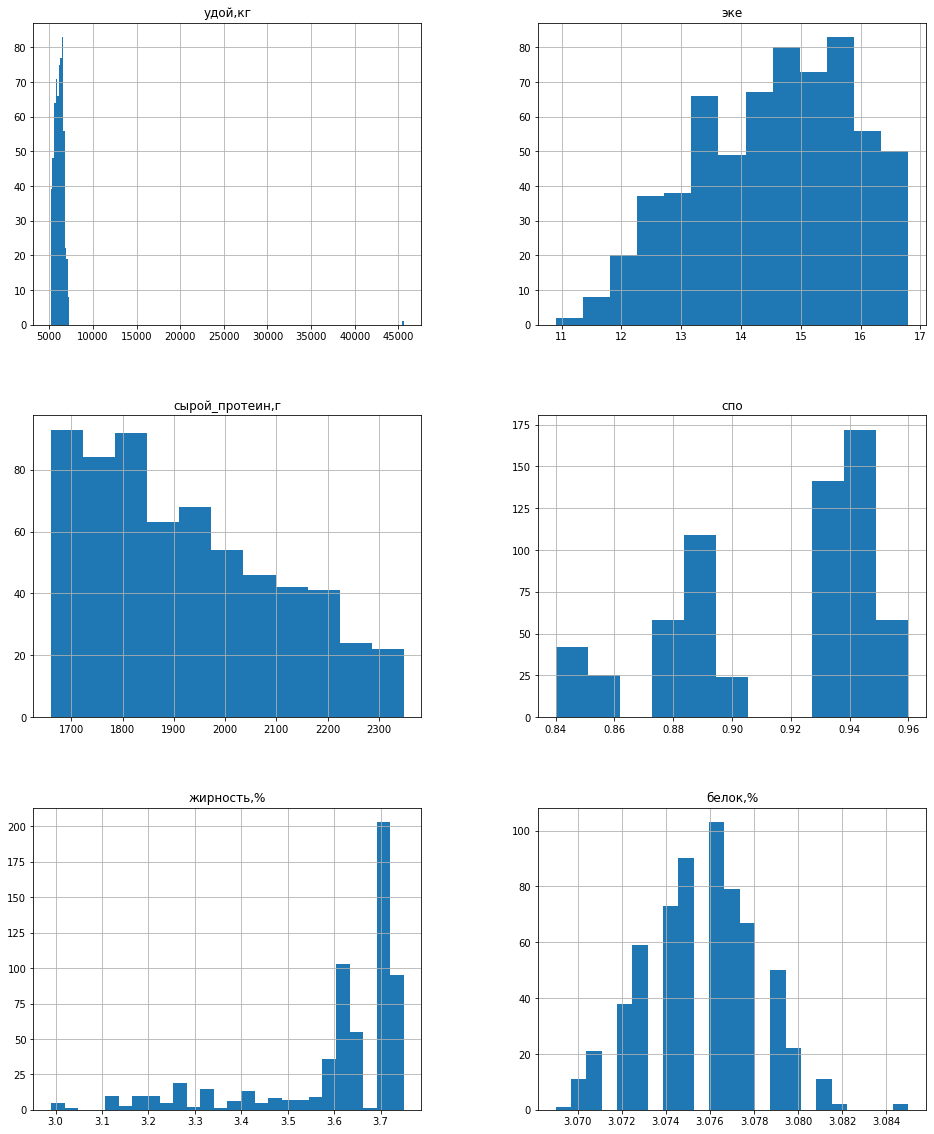

In [30]:
ferma_main[ferma_main.columns[ferma_main.columns != 'id']].hist(figsize=(16, 20), bins='auto');

ЭКЕ и Сырой протеин имеют нормальное распределение с левым и правым скосом соответственно. СПО носит ненормальный характер. Возможно, целесообразно разбить этот показатель на три признака. Жирность имеет два ярковыраженных пика - 3.6 и 3.7. Белок имеет нормальное распределение без выбросов.

 Удой имеет выбросы. Удалим их.

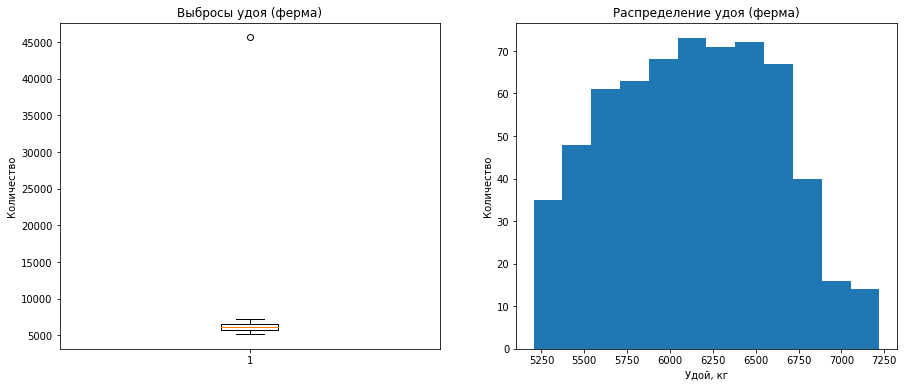

In [31]:
fig = plt.figure(figsize=(15, 6))

ax1 = fig.add_subplot(121)
ax1.boxplot(ferma_main['удой,кг'])
ax1.set_title('Выбросы удоя (ферма)')
ax1.set_ylabel('Количество')

ferma_main = ferma_main[ferma_main['удой,кг'] < 45000]

ax2 = fig.add_subplot(122)
ax2.hist(ferma_main['удой,кг'], bins='auto')
ax2.set_title('Распределение удоя (ферма)')
ax2.set_xlabel('Удой, кг')
ax2.set_ylabel('Количество');

Распределение удоя носит нормальный характер

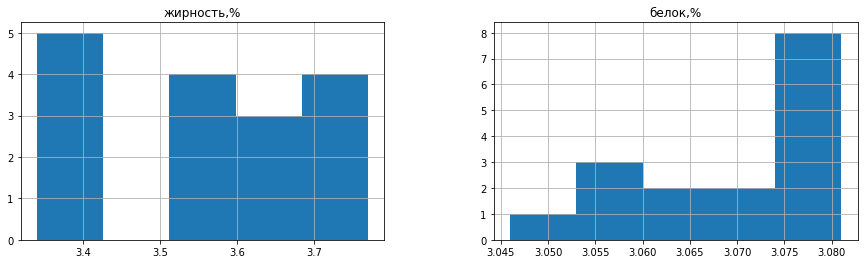

In [32]:
cow_buy[cow_buy.columns].hist(figsize=(15, 4), bins='auto');

Жирность носит ненормальный характер, по значениям разделено на две группы: 3.4 и 3.6-3.7. Белок имеет ярко выраженный пик 3.075, аналогично фермерским данным, остальные значения распределены равномерно.

#### Категориальные признаки

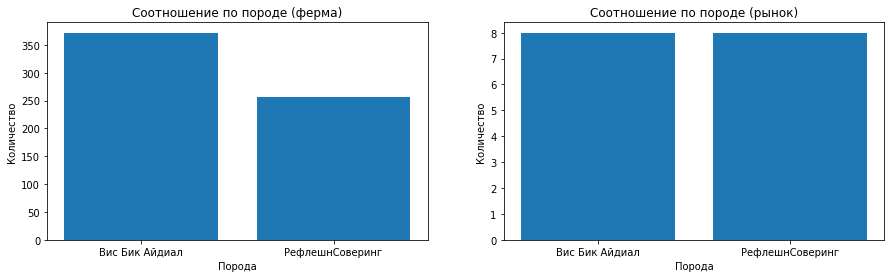

In [33]:
fig = plt.figure(figsize=(15, 4))

ax1 = fig.add_subplot(121)
a = ferma_main['порода'].value_counts()
ax1.bar(a.index, [a[0], a[1]])
ax1.set_title('Соотношение по породе (ферма)')
ax1.set_xlabel('Порода')
ax1.set_ylabel('Количество')

ax2 = fig.add_subplot(122)
a = cow_buy['порода'].value_counts()
ax2.bar(a.index, [a[0], a[1]])
ax2.set_title('Соотношение по породе (рынок)')
ax2.set_xlabel('Порода')
ax2.set_ylabel('Количество');

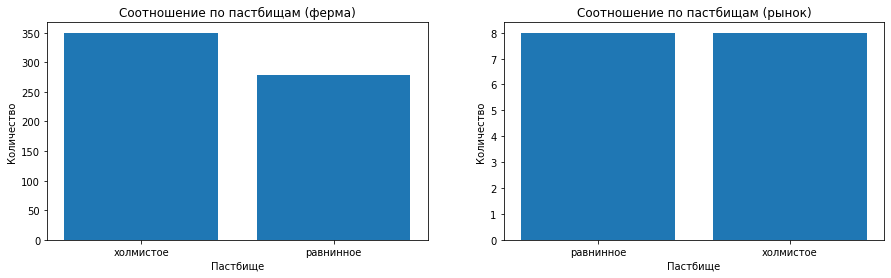

In [34]:
fig = plt.figure(figsize=(15, 4))

ax1 = fig.add_subplot(121)
a = ferma_main['тип_пастбища'].value_counts()
ax1.bar(a.index, [a[0], a[1]])
ax1.set_title('Соотношение по пастбищам (ферма)')
ax1.set_xlabel('Пастбище')
ax1.set_ylabel('Количество')

ax2 = fig.add_subplot(122)
a = cow_buy['тип_пастбища'].value_counts()
ax2.bar(a.index, [a[0], a[1]])
ax2.set_title('Соотношение по пастбищам (рынок)')
ax2.set_xlabel('Пастбище')
ax2.set_ylabel('Количество');

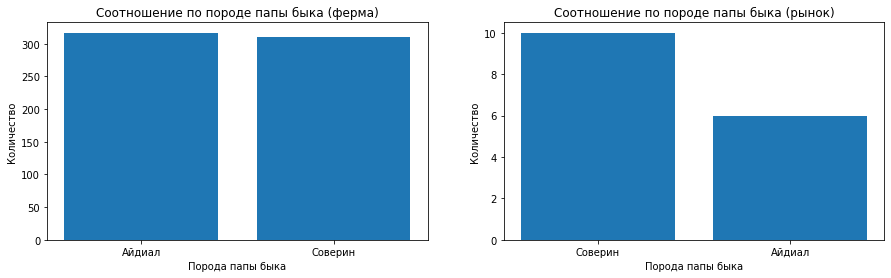

In [35]:
fig = plt.figure(figsize=(15, 4))

ax1 = fig.add_subplot(121)
a = ferma_main['порода_папы_быка'].value_counts()
ax1.bar(a.index, [a[0], a[1]])
ax1.set_title('Соотношение по породе папы быка (ферма)')
ax1.set_xlabel('Порода папы быка')
ax1.set_ylabel('Количество')

ax2 = fig.add_subplot(122)
a = cow_buy['порода_папы_быка'].value_counts()
ax2.bar(a.index, [a[0], a[1]])
ax2.set_title('Соотношение по породе папы быка (рынок)')
ax2.set_xlabel('Порода папы быка')
ax2.set_ylabel('Количество');

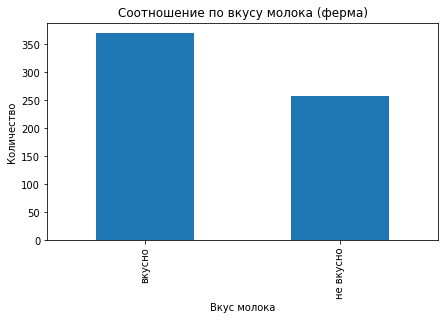

In [36]:
ferma_main['вкус_молока'].value_counts().plot.bar(figsize=(7, 4))
plt.title('Соотношение по вкусу молока (ферма)')
plt.xlabel('Вкус молока')
plt.ylabel('Количество')
plt.show()

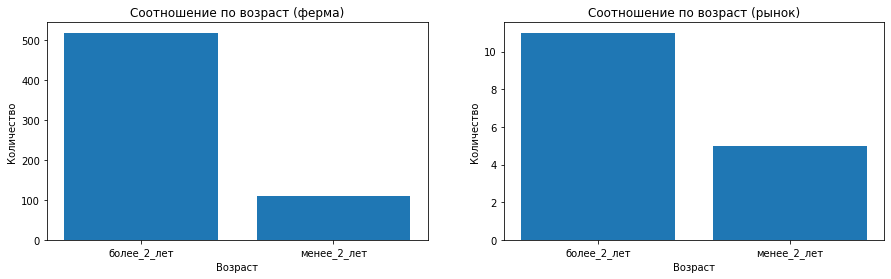

In [37]:
fig = plt.figure(figsize=(15, 4))

ax1 = fig.add_subplot(121)
a = ferma_main['возраст'].value_counts()
ax1.bar(a.index, [a[0], a[1]])
ax1.set_title('Соотношение по возраст (ферма)')
ax1.set_xlabel('Возраст')
ax1.set_ylabel('Количество')

ax2 = fig.add_subplot(122)
a = cow_buy['возраст'].value_counts()
ax2.bar(a.index, [a[0], a[1]])
ax2.set_title('Соотношение по возраст (рынок)')
ax2.set_xlabel('Возраст')
ax2.set_ylabel('Количество');

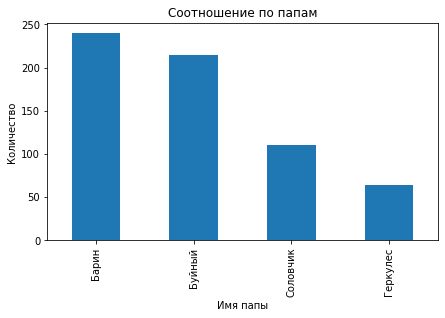

In [38]:
ferma_dad['имя_папы'].value_counts().plot.bar(figsize=(7, 4))
plt.title('Соотношение по папам')
plt.xlabel('Имя папы')
plt.ylabel('Количество')
plt.show()

Выводы:
- Нормальное распределение: ЭКЕ, Сырой протеин, Белок, Удой;
- Остальные признаки имеют ненормальное распределение;
- Значения фермерского удоя содержали выбросы, они были удалены.

<a id='section4'></a>
### Корреляционный анализ данных

In [39]:
def corPearson(df, fit1, fit2):
    df.plot(kind='scatter', x=fit1, y=fit2)
    corr1 = round(df[fit2].corr(df[fit1]), 3)
    plt.xlabel(f'{fit1}\n\nКоэффициент корреляции Пирсона = {corr1}')
    plt.ylabel(f'{fit2}')
    plt.title(f'Диаграммы рассеяния между {fit1} и {fit2}')

In [40]:
ferma_main

,id,"удой,кг",эке,"сырой_протеин,г",спо,порода,тип_пастбища,порода_папы_быка,"жирность,%","белок,%",вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет
...,...,...,...,...,...,...,...,...,...,...,...,...
624,625,6812,15.4,1964,0.940,РефлешнСоверинг,равнинное,Айдиал,3.74,3.075,не вкусно,более_2_лет
625,626,5513,12.9,1700,0.880,РефлешнСоверинг,равнинное,Соверин,3.64,3.073,вкусно,менее_2_лет
626,627,5970,14.4,1837,0.880,РефлешнСоверинг,холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
627,628,5746,13.8,1994,0.890,РефлешнСоверинг,равнинное,Соверин,3.64,3.077,вкусно,более_2_лет


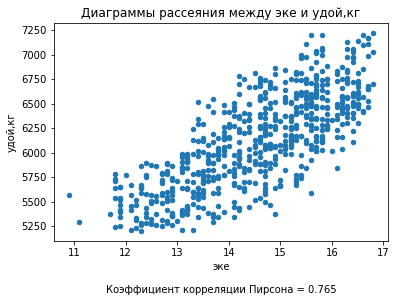

In [41]:
corPearson(ferma_main, 'эке', 'удой,кг')

Исследование показало высокую линейную связь между ЭКЕ (Энергетическая кормовая единица) и Удоями.

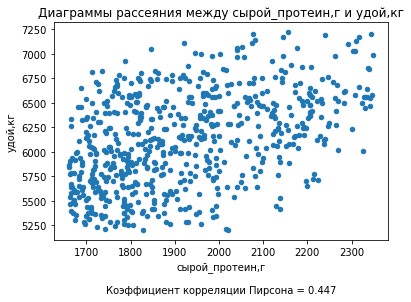

In [42]:
corPearson(ferma_main, 'сырой_протеин,г', 'удой,кг')

Исследование показало слабую линейную связь между Сырой протеин, г и Удоями.

Text(0.5, 1.0, 'Матрица корреляций Спирмана')

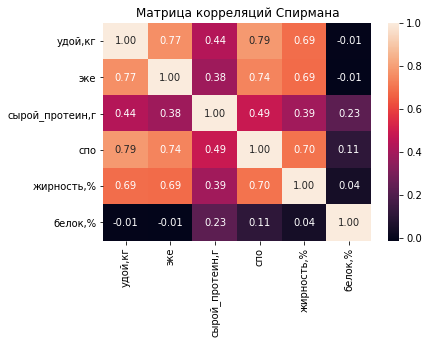

In [43]:
sns.heatmap(ferma_main[['удой,кг', 'эке', 'сырой_протеин,г', 'спо', 'жирность,%', 'белок,%']]\
            .corr(method="spearman"), annot=True, fmt='.2f').set_title('Матрица корреляций Спирмана')

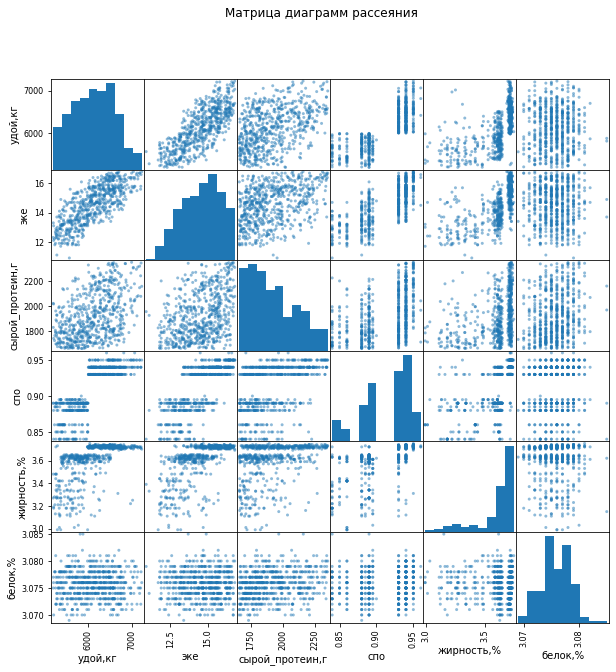

In [44]:
axes = pd.plotting.scatter_matrix(ferma_main[ferma_main.columns[ferma_main.columns != 'id']], figsize=(10, 10))
plt.suptitle('Матрица диаграмм рассеяния')
plt.show()

Выводы:
- никак не связан с целевой параметр Белок, он не влияет на Удой 
- имеет сильную и относительно линейную связь (с большим стандартным отклонением) с Удоями параметр ЭКЕ 
- слабую и нелинейную зависимость с целевой переменной имеет параметр Срыой Протеин 
- Жирность и СПО имеют нелинейную зависимость, т.к. распределение этих параметров ненормальное

Мультиколлениарность не наблюдается. Максимальная корреляция между признаками - между признаками СПО и ЭКЕ 0,79

Для построения модели целесообразно использовать следующие признаки: 
- не брать в расчет характеристика молока: Белок, Жирность, Вкус молока 
- отобрать количественные характеристики: ЭКЕ, Сырой протеин, СПО 
- отобрать категориальные признаки: Порода, Тип пастбища, Порода папы быка, Возраст

<a id='section5'></a>
### Задача регрессии

In [45]:
def lr_model(df, target, cat, num):   
    RANDOM_STATE = 42

    X = df.drop(target, axis=1)
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

    cat_col_names = cat
    num_col_names = num

    encoder = OneHotEncoder(drop='first', sparse=False)
    X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
    X_test_ohe = encoder.transform(X_test[cat_col_names])

    encoder_col_names = encoder.get_feature_names()

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[num_col_names])
    X_test_scaled = scaler.transform(X_test[num_col_names])

    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

    X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

    X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
     
    model_lr = LinearRegression()
    model_lr.fit(X_train, y_train)
    
    predictions = model_lr.predict(X_test)
    
    r2 = r2_score(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    
    print(f'R = {r2}')
    print(f'MSE = {mse}')
    print(f'MAE = {mae}')
    print(f'RMSE = {rmse}')
    
    residuals = y_test - predictions 
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,8))
    axes[0].hist(residuals, bins=100)
    axes[0].set_title('Гистограмма распределения остатков')
    axes[0].set_xlabel('Остатки')

    axes[1].scatter(x=predictions, y=residuals)
    axes[1].set_xlabel('Предсказания модели')
    axes[1].set_ylabel('Остатки')
    axes[1].set_title('Анализ дисперсии')
    plt.show()
    
    return [r2, mse, mae, rmse, predictions]

#### 1 модель

R = 0.7844078173416967
MSE = 43887.015009660514
MAE = 164.24194463474925
RMSE = 209.4922791170608


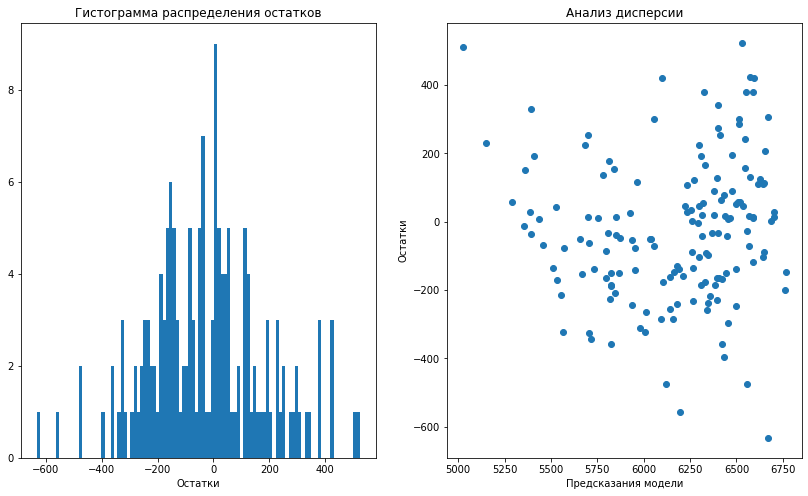

In [46]:
metrics1 = lr_model(ferma_main, 'удой,кг', ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст'], ['эке', 'сырой_протеин,г', 'спо'])

Модель имеет умеренную предсказательную способность с коэффициентом детерминации 0,78. Ошибки расположены в диапазоне от 400 до 600 единиц. Остатки имеют нормальное распределение и почти не имеют смещения. Относительно реального объема Удоя разброс остатков имеет постоянный характер.

Возможные варианты повышения качества модели:
- включить в модель СПО как категориальный признак
- взять квадрат ЭКЕ
- использовать данные об отцах

#### 2 модель

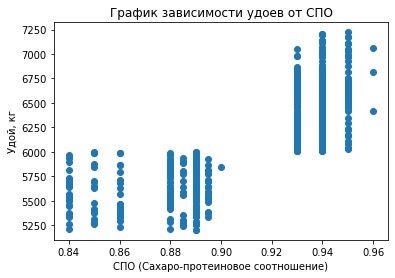

In [47]:
plt.scatter(x=ferma_main['спо'], y=ferma_main['удой,кг'])
plt.xlabel('СПО (Сахаро-протеиновое соотношение)')
plt.ylabel('Удой, кг')
plt.title('График зависимости удоев от СПО')
plt.show()

Наблюдаем на графике зависимости целевого признака от СПО (Сахаро-протеиновое соотношение). Определяем визуально, что значение 0.9 является границой нелинейности. Введем СПО (Сахаро-протеиновое соотношение) в категориальный признак. Возведем ЭКЕ в квадрат.

In [48]:
ferma_main['спо_кат'] = ferma_main['спо'].apply(lambda x: 1 if x > 0.9 else 0)
ferma_main['эке_2'] = ferma_main['эке']**2
ferma_main

,id,"удой,кг",эке,"сырой_протеин,г",спо,порода,тип_пастбища,порода_папы_быка,"жирность,%","белок,%",вкус_молока,возраст,спо_кат,эке_2
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,0,201.64
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,0,163.84
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,0,196.00
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,0,153.76
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,0,163.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,625,6812,15.4,1964,0.940,РефлешнСоверинг,равнинное,Айдиал,3.74,3.075,не вкусно,более_2_лет,1,237.16
625,626,5513,12.9,1700,0.880,РефлешнСоверинг,равнинное,Соверин,3.64,3.073,вкусно,менее_2_лет,0,166.41
626,627,5970,14.4,1837,0.880,РефлешнСоверинг,холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет,0,207.36
627,628,5746,13.8,1994,0.890,РефлешнСоверинг,равнинное,Соверин,3.64,3.077,вкусно,более_2_лет,0,190.44


R = 0.8180879926867501
MSE = 37030.91131113695
MAE = 149.03965222364602
RMSE = 192.43417396901452


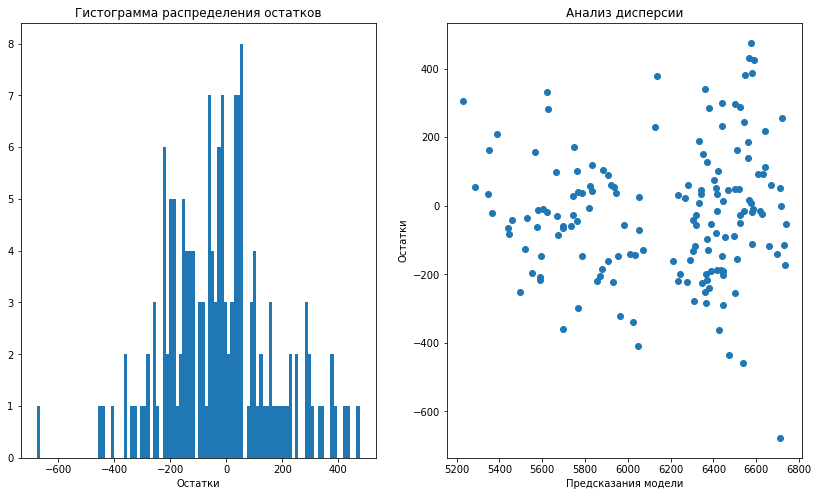

In [49]:
metrics2 = lr_model(ferma_main, 'удой,кг', ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'спо_кат'], ['эке_2', 'сырой_протеин,г'])

Коэффициент детерминации увеличился и стал 0,81. Ошибки расположены в диапазоне от 400 до 400 единиц. Остатки имеют нормальное распределение и почти не имеют смещения. Относительно реального объема Удоя разброс остатков имеет постоянный характер.

#### 3 модель

In [50]:
ferma_main_dad = pd.merge(ferma_main, ferma_dad)
ferma_main_dad

,id,"удой,кг",эке,"сырой_протеин,г",спо,порода,тип_пастбища,порода_папы_быка,"жирность,%","белок,%",вкус_молока,возраст,спо_кат,эке_2,имя_папы
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,0,201.64,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,0,163.84,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,0,196.00,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,0,153.76,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,0,163.84,Барин
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,625,6812,15.4,1964,0.940,РефлешнСоверинг,равнинное,Айдиал,3.74,3.075,не вкусно,более_2_лет,1,237.16,Буйный
624,626,5513,12.9,1700,0.880,РефлешнСоверинг,равнинное,Соверин,3.64,3.073,вкусно,менее_2_лет,0,166.41,Барин
625,627,5970,14.4,1837,0.880,РефлешнСоверинг,холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет,0,207.36,Барин
626,628,5746,13.8,1994,0.890,РефлешнСоверинг,равнинное,Соверин,3.64,3.077,вкусно,более_2_лет,0,190.44,Барин


R = 0.8247542745210406
MSE = 35673.88988618195
MAE = 146.16302445362322
RMSE = 188.8753289505592


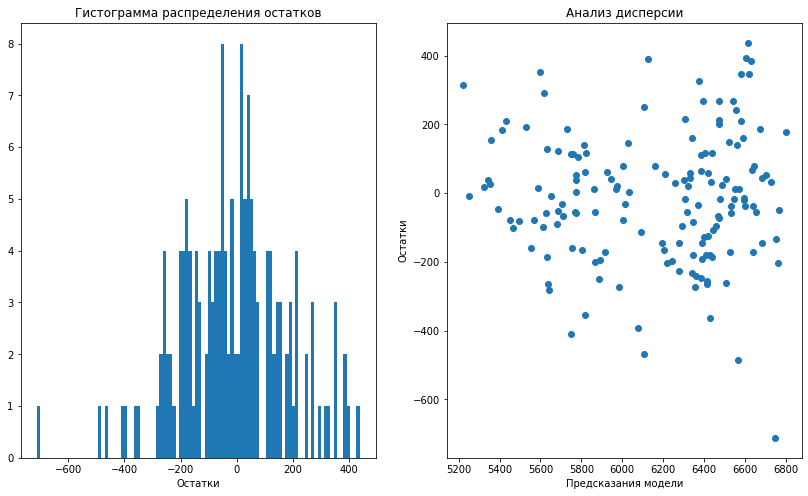

In [51]:
metrics3 = lr_model(ferma_main_dad, 'удой,кг', ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'спо_кат', 'имя_папы'], ['эке_2', 'сырой_протеин,г'])

Коэффициент детерминации увеличился незначительно и стал 0,82. Ошибки расположены в диапазоне от 400 до 400 единиц. Остатки имеют нормальное распределение и почти не имеют смещения. Относительно реального объема Удоя разброс остатков имеет постоянный характер.

In [52]:
pd.DataFrame({'1 model': metrics1[:4], '2 model': metrics2[:4], '3 model': metrics3[:4]}, index=['R', 'MSE', 'MAE', 'RMSE'])

,1 model,2 model,3 model
R,0.784408,0.818088,0.824754
MSE,43887.015010,37030.911311,35673.889886
MAE,164.241945,149.039652,146.163024
RMSE,209.492279,192.434174,188.875329


Третья модель - лучший вариант. Она показывает наименьшие ошибки. Коэффициент детерминации наиболее близок к 1. В среднем она ошибается на 189 кг удоя при прогнозировании.

In [53]:
print('95% доверительный интервал =', st.norm.interval(0.95, loc=np.mean(metrics3[4]), scale=st.sem(metrics3[4])))

95% доверительный интервал = (6092.340075854289, 6221.375070058381)


#### Модель на тестовой выборке

In [54]:
cow_buy.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,"жирность,%","белок,%",возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [55]:
cow_buy['эке'] = ferma_main['эке'].mean()*1.05
cow_buy['эке_2'] = cow_buy['эке']**2
cow_buy['сырой_протеин,г'] = ferma_main['сырой_протеин,г'].mean()*1.05
cow_buy['спо'] = ferma_main['спо'].mean()*1.05
cow_buy['возраст'] = 'менее_2_лет'
cow_buy['удой,кг'] = 0
cow_buy['спо_кат'] = cow_buy['спо'].apply(lambda x: 1 if x > 0.9 else 0)
cow_buy['возраст'] = cow_buy['возраст'].apply(lambda x: 1 if x == 'Более 2 лет' else 0)
display(cow_buy)

,порода,тип_пастбища,порода_папы_быка,имя_папы,"жирность,%","белок,%",возраст,эке,эке_2,"сырой_протеин,г",спо,"удой,кг",спо_кат
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,0,15.276162,233.361138,2019.947532,0.958744,0,1
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,0,15.276162,233.361138,2019.947532,0.958744,0,1
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,0,15.276162,233.361138,2019.947532,0.958744,0,1
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,0,15.276162,233.361138,2019.947532,0.958744,0,1
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,0,15.276162,233.361138,2019.947532,0.958744,0,1
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,0,15.276162,233.361138,2019.947532,0.958744,0,1
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,0,15.276162,233.361138,2019.947532,0.958744,0,1
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,0,15.276162,233.361138,2019.947532,0.958744,0,1
10,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,0,15.276162,233.361138,2019.947532,0.958744,0,1
11,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,0,15.276162,233.361138,2019.947532,0.958744,0,1


In [56]:
ferma_main_dad['возраст'] = ferma_main_dad['возраст'].apply(lambda x: 1 if x == 'более_2_лет' else 0)
ferma_main_dad.head()

,id,"удой,кг",эке,"сырой_протеин,г",спо,порода,тип_пастбища,порода_папы_быка,"жирность,%","белок,%",вкус_молока,возраст,спо_кат,эке_2,имя_папы
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,1,0,201.64,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,0,0,163.84,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,1,0,196.00,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,1,0,153.76,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,0,0,163.84,Барин


In [57]:
cow_buy

,порода,тип_пастбища,порода_папы_быка,имя_папы,"жирность,%","белок,%",возраст,эке,эке_2,"сырой_протеин,г",спо,"удой,кг",спо_кат
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,0,15.276162,233.361138,2019.947532,0.958744,0,1
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,0,15.276162,233.361138,2019.947532,0.958744,0,1
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,0,15.276162,233.361138,2019.947532,0.958744,0,1
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,0,15.276162,233.361138,2019.947532,0.958744,0,1
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,0,15.276162,233.361138,2019.947532,0.958744,0,1
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,0,15.276162,233.361138,2019.947532,0.958744,0,1
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,0,15.276162,233.361138,2019.947532,0.958744,0,1
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,0,15.276162,233.361138,2019.947532,0.958744,0,1
10,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,0,15.276162,233.361138,2019.947532,0.958744,0,1
11,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,0,15.276162,233.361138,2019.947532,0.958744,0,1


In [58]:
X_train = ferma_main_dad
X_test = cow_buy

target = 'удой,кг'
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'спо_кат', 'имя_папы']
num_col_names = ['эке_2', 'сырой_протеин,г']

X = X_train.drop(target, axis=1)
y = X_train[target]

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False) 
X_ohe = encoder.fit_transform(X[cat_col_names])

encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[num_col_names])

X_ohe = pd.DataFrame(X_ohe, columns=encoder_col_names)

X_scaled = pd.DataFrame(X_scaled, columns=num_col_names)

X = pd.concat([X_ohe, X_scaled], axis=1)
                  
model_lr = LinearRegression()
model_lr.fit(X, y) 

X = X_test.drop(target, axis=1)
y = X_test[target]

X_ohe = encoder.transform(X[cat_col_names])

encoder_col_names = encoder.get_feature_names()

X_scaled = scaler.transform(X[num_col_names])

X_ohe = pd.DataFrame(X_ohe, columns=encoder_col_names)
X_scaled = pd.DataFrame(X_scaled, columns=num_col_names)

X_cow = pd.concat([X_ohe, X_scaled], axis=1)   

predictions = model_lr.predict(X_cow)

cow_buy = cow_buy.reset_index(drop=True)

for i in range(len(cow_buy['удой,кг'])):
    cow_buy.loc[i,'удой,кг'] = predictions[i]

display(cow_buy.sort_values(by='удой,кг', ascending=False))

,порода,тип_пастбища,порода_папы_быка,имя_папы,"жирность,%","белок,%",возраст,эке,эке_2,"сырой_протеин,г",спо,"удой,кг",спо_кат
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,0,15.276162,233.361138,2019.947532,0.958744,6370.5,1
9,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,0,15.276162,233.361138,2019.947532,0.958744,6370.5,1
14,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.77,3.053,0,15.276162,233.361138,2019.947532,0.958744,6370.5,1
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,0,15.276162,233.361138,2019.947532,0.958744,6364.5,1
7,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,0,15.276162,233.361138,2019.947532,0.958744,6364.5,1
12,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.065,0,15.276162,233.361138,2019.947532,0.958744,6364.5,1
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,0,15.276162,233.361138,2019.947532,0.958744,6359.5,1
10,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.68,3.046,0,15.276162,233.361138,2019.947532,0.958744,6359.5,1
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,0,15.276162,233.361138,2019.947532,0.958744,6319.5,1
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,0,15.276162,233.361138,2019.947532,0.958744,6319.5,1


In [59]:
cow_buy.sort_values (by=['удой,кг'], ascending=False).loc[cow_buy['удой,кг'] >= 6000]

,порода,тип_пастбища,порода_папы_быка,имя_папы,"жирность,%","белок,%",возраст,эке,эке_2,"сырой_протеин,г",спо,"удой,кг",спо_кат
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,0,15.276162,233.361138,2019.947532,0.958744,6370.5,1
9,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,0,15.276162,233.361138,2019.947532,0.958744,6370.5,1
14,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.77,3.053,0,15.276162,233.361138,2019.947532,0.958744,6370.5,1
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,0,15.276162,233.361138,2019.947532,0.958744,6364.5,1
7,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,0,15.276162,233.361138,2019.947532,0.958744,6364.5,1
12,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.065,0,15.276162,233.361138,2019.947532,0.958744,6364.5,1
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,0,15.276162,233.361138,2019.947532,0.958744,6359.5,1
10,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.68,3.046,0,15.276162,233.361138,2019.947532,0.958744,6359.5,1
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,0,15.276162,233.361138,2019.947532,0.958744,6319.5,1
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,0,15.276162,233.361138,2019.947532,0.958744,6319.5,1


Вывод:
- Построены модели линейной регрессии на данных датасета farm_main.csv и определена по значениям метрик наболее точная;
- В наилучшей модели значение коэффициента детерминации равно 0.82, ближе всего к единице;
- Применена лучшая по качеству и по точности модель к данным из датасета cow_buy.csv и получен прогноз удоя коров.
- Определен прогноз коров с ассоциации пастбищ "ЭкоФерма" с удоем не менее 6000 кг в год.

<a id='section6'></a>
### Задача классификации

In [60]:
ferma_main['вкус_молока'].unique()

array(['вкусно', 'не вкусно'], dtype=object)

In [61]:
ferma_main['возраст'] = ferma_main['возраст'].apply(lambda x: 1 if x == 'более_2_лет' else 0)
ferma_main['вкус_молока'] = ferma_main['вкус_молока'].apply(lambda x: 1 if x == 'вкусно' else 0)
cow_buy['вкус_молока'] = 0

RANDOM_STATE = 42

X = ferma_main.drop('вкус_молока', axis=1)
y = ferma_main['вкус_молока']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст']
num_col_names = ['эке', 'сырой_протеин,г', 'спо', 'жирность,%' , 'белок,%']

encoder = OneHotEncoder(drop='first', sparse=False) 
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names() 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

clf = LogisticRegression()

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

y_proba = clf.predict_proba(X_test)[:,1]

acc = accuracy_score(y_test, y_pred)  
precision = precision_score(y_test, y_pred) 
recall = recall_score(y_test, y_pred)       

Accuracy =  0.6050955414012739
Precision =  0.6065573770491803
Recall =  0.8409090909090909


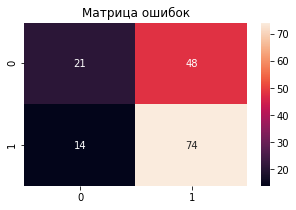

In [62]:
plt.figure(figsize = (5,3))
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d');
plt.title('Матрица ошибок')
print('Accuracy = ', acc)
print('Precision = ', precision)
print('Recall = ', recall)

Проведенный анализ показал, что значение Recall=0.85 больше Precision=0.61. Критичнее всего при покупке коров ложно-положительная ошибка. Сейчас модель допускает ошибку первого рода в 48 случаях. Рассчитаем метрики для случая, когда критическая ошибка будет равна 0.

In [63]:
data = pd.DataFrame(zip(y_test, y_proba),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)

print(data.head())

    y_valid   y_proba
33        0  0.848273
17        1  0.827808
85        1  0.819860
66        1  0.810052
95        1  0.790444


In [64]:
thresholds = [round(i, 2) for i in np.linspace(0.1, 1, num = 2000, endpoint=False)]

In [65]:
columns = []

for i in thresholds:
    columns.append('y_pred_' + str(i))
    data['y_pred_' + str(i)] = data['y_proba'].apply(lambda x: 1 if x >= i else 0)

display(data.head())

,y_valid,y_proba,y_pred_0.1,y_pred_0.11,y_pred_0.12,y_pred_0.13,y_pred_0.14,y_pred_0.15,y_pred_0.16,y_pred_0.17,...,y_pred_0.91,y_pred_0.92,y_pred_0.93,y_pred_0.94,y_pred_0.95,y_pred_0.96,y_pred_0.97,y_pred_0.98,y_pred_0.99,y_pred_1.0
33,0,0.848273,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
17,1,0.827808,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
85,1,0.819860,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
66,1,0.810052,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
95,1,0.790444,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [66]:
for i in thresholds:
    cm = confusion_matrix(y_test, data['y_pred_' + str(i)])
    if cm[0][1] == 0:
        print('Порог = ', i ,'Precision = ', round(precision_score(y_test, data['y_pred_'+str(i)]), 2))
        porog = i
        break

Порог =  0.82 Precision =  1.0


Accuracy =  0.45
Precision =  1.0
Recall =  0.02


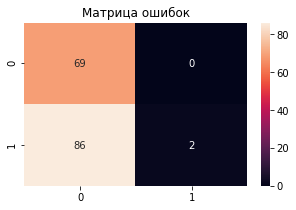

In [67]:
acc = round(accuracy_score(y_test, data['y_pred_' + str(porog)]), 2)
precision = round(precision_score(y_test, data['y_pred_' + str(porog)]), 2)
recall = round(recall_score(y_test, data['y_pred_' + str(porog)]), 2)

plt.figure(figsize = (5, 3))
cm = confusion_matrix(y_test, data['y_pred_' + str(porog)])

sns.heatmap(cm, annot=True, fmt='d');
plt.title('Матрица ошибок')
print('Accuracy = ', acc)
print('Precision = ', precision)
print('Recall = ', recall)  

In [68]:
X_train = ferma_main_dad
X_test = cow_buy

X = X_train.drop('вкус_молока', axis=1)
y = X_train['вкус_молока']

cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст']
num_col_names = ['эке', 'сырой_протеин,г', 'спо', 'жирность,%' , 'белок,%']

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_ohe = encoder.fit_transform(X[cat_col_names])

encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[num_col_names])

X_ohe = pd.DataFrame(X_ohe, columns=encoder_col_names)

X_scaled = pd.DataFrame(X_scaled, columns=num_col_names)

X = pd.concat([X_ohe, X_scaled], axis=1)
                  
clf = LogisticRegression()
clf = clf.fit(X, y)

X = X_test.drop('вкус_молока', axis=1)
y = X_test['вкус_молока']

X_ohe = encoder.transform(X[cat_col_names])

encoder_col_names = encoder.get_feature_names()

X_scaled = scaler.transform(X[num_col_names])

X_ohe = pd.DataFrame(X_ohe, columns=encoder_col_names)
X_scaled = pd.DataFrame(X_scaled, columns=num_col_names)

X_cow = pd.concat([X_ohe, X_scaled], axis=1)   

y_pred = clf.predict_proba(X_cow)[:,1] 

cow_buy['y_pred'] = y_pred

cow_buy['вкус_молока'] = cow_buy['y_pred'].apply(lambda x: 'вкусно' if x > porog else 'не вкусно')      
cow_buy['возраст'] = cow_buy['возраст'].apply(lambda x: 'более 2 лет' if x == 1 else 'менее 2 лет')

cow_buy = cow_buy.sort_values(by = ['y_pred'], ascending = False)
cow_buy = cow_buy.drop(columns='y_pred') 

cow_buy

,порода,тип_пастбища,порода_папы_быка,имя_папы,"жирность,%","белок,%",возраст,эке,эке_2,"сырой_протеин,г",спо,"удой,кг",спо_кат,вкус_молока
10,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.68,3.046,менее 2 лет,15.276162,233.361138,2019.947532,0.958744,6359.5,1,не вкусно
14,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.77,3.053,менее 2 лет,15.276162,233.361138,2019.947532,0.958744,6370.5,1,не вкусно
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее 2 лет,15.276162,233.361138,2019.947532,0.958744,6370.5,1,не вкусно
8,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,менее 2 лет,15.276162,233.361138,2019.947532,0.958744,6138.0,1,не вкусно
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,менее 2 лет,15.276162,233.361138,2019.947532,0.958744,6364.5,1,не вкусно
9,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,менее 2 лет,15.276162,233.361138,2019.947532,0.958744,6370.5,1,не вкусно
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,менее 2 лет,15.276162,233.361138,2019.947532,0.958744,6319.5,1,не вкусно
15,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.34,3.069,менее 2 лет,15.276162,233.361138,2019.947532,0.958744,6319.5,1,не вкусно
12,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.065,менее 2 лет,15.276162,233.361138,2019.947532,0.958744,6364.5,1,не вкусно
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,менее 2 лет,15.276162,233.361138,2019.947532,0.958744,6085.5,1,не вкусно


Наблюдаем при пороге 0.82 нулевое значение критической ошибки 1-го рода FP. При этом количество истинно-положительного результата равно 2.
Самое оптимальное значение порога — 0.82.

Покажем список коров с ассоциации пастбищ "ЭкоФерма" с признаком по вкусу молока "вкусно".

In [69]:
cow_buy.loc[cow_buy['вкус_молока'] == 'вкусно']

,порода,тип_пастбища,порода_папы_быка,имя_папы,"жирность,%","белок,%",возраст,эке,эке_2,"сырой_протеин,г",спо,"удой,кг",спо_кат,вкус_молока


На практике модель выдала, что коров с вкусным молоком нет.

<a id='section7'></a>
### Итоговые выводы

Учитвая полученные ранее данные с коровами по годовому удою выше 6000 кг и с признаком по вкусу молоко "вкусно" объеденим эти данные.

In [70]:
cow_buy.sort_values(by=['удой,кг'], ascending=False)\
.loc[(cow_buy['удой,кг'] >= 6000) & (cow_buy['вкус_молока'] == 'вкусно')]

,порода,тип_пастбища,порода_папы_быка,имя_папы,"жирность,%","белок,%",возраст,эке,эке_2,"сырой_протеин,г",спо,"удой,кг",спо_кат,вкус_молока


Получается, нет коров, которые бы удовлетворяли одновременно двум параметрам (Удой больше 6000 и Вкусное молоко)

Данные состоят из трех таблиц: 
- данные по фермерскому стаду, 
- данные по покупаемому стаду 
- справочная таблица об отцах

На превом этапе была осуществлена предобработка данных:

- были проверены пропуски в таблицах и таковых обнаружено не было
- в данных были удалены спецсимволы, а также категориальные столбца были приведены к нижнему регистру
- были удалены дубликаты

На втором этапе был проведен статистический анализ данных:

- были выявлены выбросы в данных по распределению Удоя, которые были удалены 
- Также было выявлено:
    - никак не связан с целевой параметр Белок - он не влияет на Удой
    - имеет сильную и относительно линейную связь (с большим стандартным отклонением) с Удоями параметр ЭКЕ
    - слабую и нелинейную зависимость с целевой переменной имеет параметр Сырой протеин
    - также два признака Жирность и СПО имеют нелинейную зависимость, т.к. распределение этих параметров ненормальное
- По результатам предваорительного анализа было определено, что для построения модели целесообразно использовать следующие признаки:
    - не брать в расчет параметр Белок, т.к. связи с целевой переменной практически нет
    - не брать в расчет СПО, поскольку у него нелинейная заивисмость и мультиколлдинеарность с ЭКЕ
    - признак вкуса не брать его т.к. в данных по покупаемому стаду нет этого признака
    - в качестве признака отобрать параметр ЭКЕ
    - взять в расчет параметр Сырой протеин

Среди построенных линейных регрессий для прогнозирования Удоя была отобрана регрессия:

- в которую по итогу был добавлен параметр СПО, преобразованный в категориальный признак
- параметры ЭКЕ и Жирность были возведены в квадрат
- коэффициент итоговой линейной регрессии составил 0,82
- остатки регресиси распределены нормально и практически без смещений с отсутствием автокорреляции
- доверительный интервал полученых прогнозов (95%), что удои находятся в диапазоне (6092.340075854289, 6221.375070058381)

Была также построена логистическая регрессия для прогнозирования вкуса молока:

- в процессе калибровке был определен порог в размере 0,82, который сводит к минимуму ошибку прогнозирования вкуса молока (ошибку первого рода, при которой вкус молока прогнозируется вкусным, хотя в реальности таковым не является)

По итогу построений линейиной и логистической регрессии было выявлено, что коровы в покупаемм стаде, дающие одновременно приемлемый уровень удоя (не менее 6000 кг) и при этом вкусное молока в приобретаемом стаде отсутствуют